In [1]:
print ("Tarea 3 Dataset de Regresión Logística")

Tarea 3 Dataset de Regresión Logística


In [3]:
#Hacemos el cargue de las librerias para comenzar con el trabajo.

import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
#Hacemos el cargue del Dataset de enfermedad cardiaca 
Datos = pd.read_csv(filepath_or_buffer = "./heart_cleveland_upload.csv")

In [13]:
#lectura de los Datos para el análisis exploratorio

Datos.head(24)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [15]:
#Descripción de los Datos

Datos.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


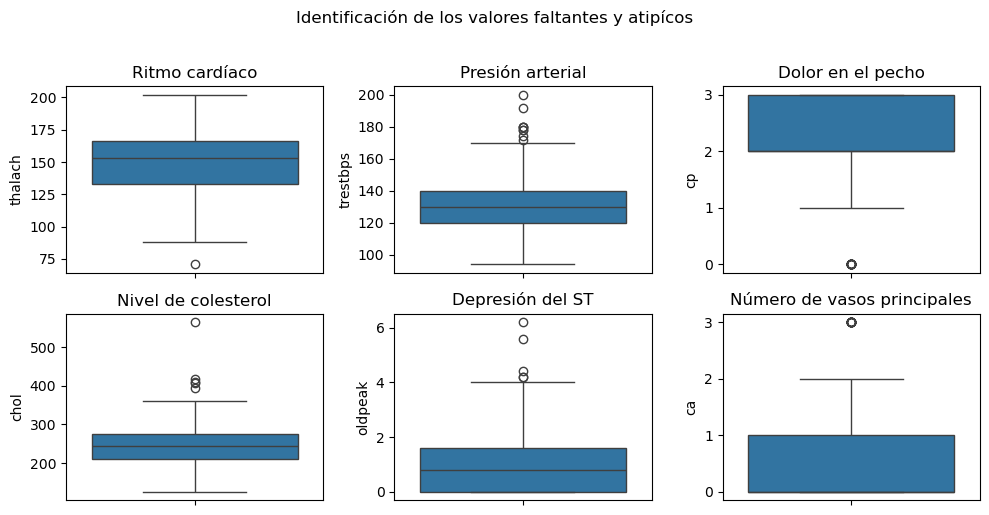

In [19]:
#Identificación de datos faltantes y atipicos

fig, axs = plt.subplots(2,3, figsize =(10,5))
plt1 = sns.boxplot(Datos['thalach'], ax = axs[0,0]).set_title('Ritmo cardíaco')
plt2 = sns.boxplot(Datos['trestbps'], ax = axs[0,1]).set_title('Presión arterial')
plt3 = sns.boxplot(Datos['cp'], ax = axs[0,2]).set_title('Dolor en el pecho')
plt1 = sns.boxplot(Datos['chol'], ax = axs[1,0]).set_title('Nivel de colesterol')
plt2 = sns.boxplot(Datos['oldpeak'], ax = axs[1,1]).set_title('Depresión del ST')
plt3 = sns.boxplot(Datos['ca'], ax = axs[1,2]).set_title('Número de vasos principales')
fig.suptitle('Identificación de los valores faltantes y atipícos', y=1.02)
plt.tight_layout()
plt.show()

In [23]:
#Revisición de datos faltantes

print ("Cantidad de registros con cero en Rítmo cardíaco: ",Datos['thalach'].isin([0]).sum())
print ("Cantidad de registros con cero en Presión arterial: ",Datos['trestbps'].isin([0]).sum())
print ("Cantidad de registros con cero en Dolor en el pecho: ",Datos['cp'].isin([0]).sum())
print ("Cantidad de registros con cero en Nivel de colesterol: ",Datos['chol'].isin([0]).sum())
print ("Cantidad de registros con cero en Depresión del ST: ",Datos['oldpeak'].isin([0]).sum())
print ("Cantidad de registros con cero en Número de vasos principales: ",Datos['ca'].isin([0]).sum())

Cantidad de registros con cero en Rítmo cardíaco:  0
Cantidad de registros con cero en Presión arterial:  0
Cantidad de registros con cero en Dolor en el pecho:  23
Cantidad de registros con cero en Nivel de colesterol:  0
Cantidad de registros con cero en Depresión del ST:  96
Cantidad de registros con cero en Número de vasos principales:  174


In [25]:
#Reemplazo todos los valores que estan en cero por el valor medio (promedio) de la columna.

Datos['cp']=Datos['cp'].replace(0,Datos['cp'].mean())
Datos['oldpeak']=Datos['oldpeak'].replace(0,Datos['oldpeak'].mean())
Datos['ca']=Datos['ca'].replace(0,Datos['ca'].mean())

In [27]:
#Revisión nuevamente de datos faltantes

print ("Cantidad de registros con cero en Rítmo cardíaco: ",Datos['thalach'].isin([0]).sum())
print ("Cantidad de registros con cero en Presión arterial: ",Datos['trestbps'].isin([0]).sum())
print ("Cantidad de registros con cero en Dolor en el pecho: ",Datos['cp'].isin([0]).sum())
print ("Cantidad de registros con cero en Nivel de colesterol: ",Datos['chol'].isin([0]).sum())
print ("Cantidad de registros con cero en Depresión del ST: ",Datos['oldpeak'].isin([0]).sum())
print ("Cantidad de registros con cero en Número de vasos principales: ",Datos['ca'].isin([0]).sum())

Cantidad de registros con cero en Rítmo cardíaco:  0
Cantidad de registros con cero en Presión arterial:  0
Cantidad de registros con cero en Dolor en el pecho:  0
Cantidad de registros con cero en Nivel de colesterol:  0
Cantidad de registros con cero en Depresión del ST:  0
Cantidad de registros con cero en Número de vasos principales:  0


Text(0.5, 1.0, 'Valores Atípicos presión arterial')

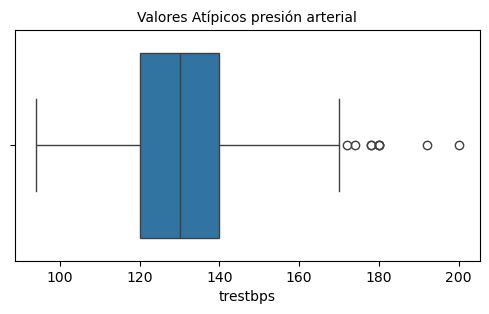

In [51]:
#Identificación de datos atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['trestbps'])
plt.title('Valores Atípicos presión arterial', fontsize=10)

In [59]:
#Conteo de datos atípicos

Nivel_minimo=120
Nivel_maximo=200
Total_atipicos=((Datos['trestbps']<Nivel_minimo)|(Datos['trestbps']>Nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_atipicos))

El total de datos atípicos es 60


In [61]:
#Revisión de tipos de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    float64
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    float64
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 32.6 KB


In [63]:
#Seleccionamos las características más relevantes para entrenar el modelo utilizando selección de características.
#La columna o variable objetivo es la presencia de enfermedad cardíaca.
# "1" hace referencia a que la persona TIENE enfermedad cardiaca
# "0" hace referencia a que la persona NO tiene enfermedad cardiaca

Datos['condition'].value_counts()

condition
0    160
1    137
Name: count, dtype: int64

In [65]:
Datos[['condition']].head(21)

,condition
0,0
1,0
2,0
3,1
4,0
5,0
6,0
7,1
8,0
9,0


In [67]:
#Haremos la división del Dataset en datos train y test para evaluar el modelo.
#Para el train escogeremos el 80% y para el test el 20%, asi escogeremos (x) y (y)

X =Datos.drop('condition', axis=1) #cargaremos todas las columnas excepto la de condición
Y =Datos['condition'] #cargaremos solo la columna de condición
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.20, stratify=Y, random_state=0)

In [69]:
print(X_train)

     age  sex        cp  trestbps  chol  fbs  restecg  thalach  exang  \
261   51    1  3.000000       140   261    0        2      186      1   
121   51    0  2.000000       140   308    0        2      142      0   
12    59    1  2.158249       134   204    0        0      162      0   
141   44    1  2.000000       120   226    0        0      169      0   
29    62    1  1.000000       128   208    1        2      140      0   
..   ...  ...       ...       ...   ...  ...      ...      ...    ...   
174   64    1  3.000000       120   246    0        2       96      1   
294   35    1  3.000000       120   198    0        0      130      1   
135   46    0  2.000000       142   177    0        2      160      1   
252   53    1  3.000000       123   282    0        0       95      1   
246   54    1  3.000000       110   239    0        0      126      1   

      oldpeak  slope        ca  thal  
261  1.055556      0  0.676768     0  
121  1.500000      0  1.000000     0  
12   0

In [73]:
#Entrenamos el modelo configurando los diferentes hiperparámetros.
Tarea3_Regresion_Logistica = LogisticRegression(solver ="liblinear")
Tarea3_Regresion_Logistica.fit (X_train , Y_train)

prediccion = Tarea3_Regresion_Logistica.predict(X_test)

print(Y_test)

129    1
7      1
162    1
183    1
264    1
263    1
279    1
35     1
280    1
224    1
272    0
177    0
111    0
97     0
255    1
51     0
211    1
117    0
151    0
249    0
163    1
94     0
77     0
47     0
55     0
149    0
33     1
202    1
218    0
39     0
230    1
116    0
271    0
42     0
244    1
96     1
30     0
108    0
131    0
201    1
110    0
270    1
216    1
285    0
198    1
76     1
89     0
63     0
168    1
14     0
235    1
105    0
217    1
185    1
46     0
160    1
148    0
137    0
43     0
276    0
Name: condition, dtype: int64


In [75]:
print (prediccion)

[1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0
 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 0 0]


In [77]:
#Evaluamos el desempeño del modelo en el conjunto de Test con métrica coo presición, recall,F1-score.


print (classification_report(Y_test,prediccion))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86        32
           1       0.85      0.82      0.84        28

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60



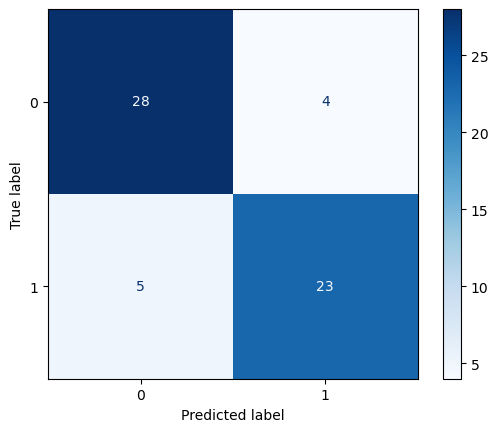

In [97]:
#Realizamos las diferentes gráficas que permitiran visualizar los resultados del modelo.

cm=confusion_matrix(Y_test,prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

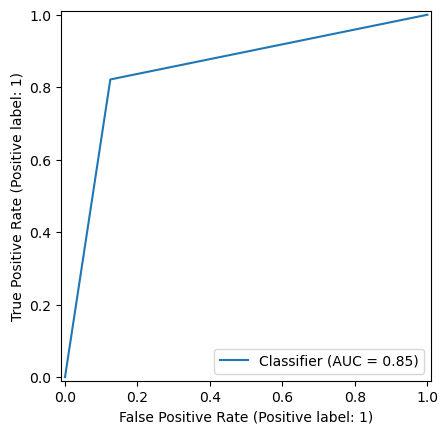

In [99]:
#Curva de presición

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test , prediccion)
plt.show()